# Tutorial for Numpy and Matplotlib - Lab 0

### Installation
Numpy and Matplotlib should be the most common packages used in python scientific programs. In this short document, we seek to provide a quick introduction to help you get acquanited with it.

Detailed installation guidance can be found here: https://scipy.org/install.html. We strongly recoomend you install numpy and matplotlib by anaconda, which can also be found in this link.

### Before everything
Always, you should always read official tutorial if you want to learn it. I think it can solve almost all the questions for you. 
- https://docs.scipy.org/doc/numpy/user/quickstart.html (Numpy) 
- https://matplotlib.org/tutorials/index.html (Matplotlib). 

However, in this short document I really want to help you get acquianted with numpy and matplotlib quickly(For those who never used it). Below, I will try to show you some basic usage(magic) of numpy bros to solve a real problem. 

**For all the codes experimented here, I strongly recommend you to check related functions in the offcial site, at least check it by help() function.**

### China Food Analysis

Suppose we have a dataset called 'Chinafood.txt' which contains the sales record of different chinese food in London last 4 monthes.

| Month/Type| A |B| C |D |E|
|------|------|------|------|------|------|
|Sept  | 1| 3 |5 |7| 9
|Aug   |2 |4 |6 |8 |10
|Jul   |7 |5 |3 |1 |13
|Jun   |6 |6 |6 |6 |6|

The boss now want me to analyze the dataset to get some precitions about marker share and sales trends thus to improve profit.
Now, let's begin!

### Numpy

In [1]:
import numpy as np

#### Creation

We create our dataset by np.array function which is the basic creation method for numpy array. Here a matrix has been constructed, similarly we can create a vector or more-dimensional data. Try it!

In [2]:
chinafood = np.array([[1,3,5,7,9],
                     [2,4,6,8,10],
                     [7,5,3,1,13],
                     [6,6,6,6,6]])
print(chinafood)

[[ 1  3  5  7  9]
 [ 2  4  6  8 10]
 [ 7  5  3  1 13]
 [ 6  6  6  6  6]]


In [3]:
test = np.array((1,10))
print(test)
print("------------")
test = np.array([[[1,10],[2,5],[3,6]],
                [[1,10],[2,5],[3,6]],
                [[1,10],[2,5],[3,6]]])
print(test)

[ 1 10]
------------
[[[ 1 10]
  [ 2  5]
  [ 3  6]]

 [[ 1 10]
  [ 2  5]
  [ 3  6]]

 [[ 1 10]
  [ 2  5]
  [ 3  6]]]


#### Slice and Index

We can check sales records by slicling and indexing:

In [4]:
print('Sept A Sales:', chinafood[0,0])

Sept A Sales: 1


In [5]:
print('Sept Sales :', chinafood[0,:])
print('A Sales:', chinafood[:,0])
# similaryly in python list, : can be used to indexing a row or col

Sept Sales : [1 3 5 7 9]
A Sales: [1 2 7 6]


We can calculate basic statistics of each month/type of food.

In [6]:
np.mean(chinafood[2,:]) #Mean sales for July

5.8

In [7]:
np.max(chinafood[:,3]) #Max sales for D

8

In [8]:
np.std(chinafood[:,2]) #Standard sales deviation for C

1.224744871391589

####  Reshape

Suppose we just collected some new data of October sales record:(Here we simulate it artifically, that's actually another method to create a numpy array)

In [9]:
Oct = np.random.randint(0,10,[1,5]) #Create a 1*4 matrix of random int values in range(0-10)
print(Oct)
#Some other methods like np.ones/np.zeros/np.eyes/np.empty can be used to generate numpy array without specify input. Try it!

[[6 2 7 9 5]]


We want to augment it to the chinafood data:

In [10]:
chinafood = np.concatenate((Oct,chinafood),axis=0)

In [11]:
chinafood

array([[ 6,  2,  7,  9,  5],
       [ 1,  3,  5,  7,  9],
       [ 2,  4,  6,  8, 10],
       [ 7,  5,  3,  1, 13],
       [ 6,  6,  6,  6,  6]])

Now you can see the Oct data has been on the top of matrix!

Besides, we can change the shape of matrix(Though it means nothing in this problem):

In [12]:
chinafood.reshape(1,25) #we can only do this actually

array([[ 6,  2,  7,  9,  5,  1,  3,  5,  7,  9,  2,  4,  6,  8, 10,  7,
         5,  3,  1, 13,  6,  6,  6,  6,  6]])

In [13]:
test = np.array([[1,2,4,5,4,6],
                [1,4,7,2,4,7],
                [3,6,8,9,2,1],
                [3,5,7,8,0,2]])
print(test)
test.reshape(-1,12)# Just guess what -1 means here
print(test) # reshape is not a inplace operation!
print(test.reshape(-1,12))

[[1 2 4 5 4 6]
 [1 4 7 2 4 7]
 [3 6 8 9 2 1]
 [3 5 7 8 0 2]]
[[1 2 4 5 4 6]
 [1 4 7 2 4 7]
 [3 6 8 9 2 1]
 [3 5 7 8 0 2]]
[[1 2 4 5 4 6 1 4 7 2 4 7]
 [3 6 8 9 2 1 3 5 7 8 0 2]]


#### Operations

Numpy array support basic operations both by built_in operators and functions. 

In [14]:
parischinafood = chinafood * 2 # The sales in Paris is double in London
print(parischinafood)

[[12  4 14 18 10]
 [ 2  6 10 14 18]
 [ 4  8 12 16 20]
 [14 10  6  2 26]
 [12 12 12 12 12]]


In [15]:
parischinafood + 1

array([[13,  5, 15, 19, 11],
       [ 3,  7, 11, 15, 19],
       [ 5,  9, 13, 17, 21],
       [15, 11,  7,  3, 27],
       [13, 13, 13, 13, 13]])

One common error here: do not use * as matrix multiplcation, use dot function or @

In [16]:
chinafood * chinafood

array([[ 36,   4,  49,  81,  25],
       [  1,   9,  25,  49,  81],
       [  4,  16,  36,  64, 100],
       [ 49,  25,   9,   1, 169],
       [ 36,  36,  36,  36,  36]])

In [17]:
chinafood.dot(chinafood)

array([[145, 121, 151, 163, 265],
       [122, 120, 127, 131, 227],
       [144, 140, 154, 162, 270],
       [138, 124, 173, 201, 201],
       [132, 120, 162, 186, 258]])

In [18]:
chinafood @ chinafood

array([[145, 121, 151, 163, 265],
       [122, 120, 127, 131, 227],
       [144, 140, 154, 162, 270],
       [138, 124, 173, 201, 201],
       [132, 120, 162, 186, 258]])

In [19]:
np.power(chinafood,3) #Cubics

array([[ 216,    8,  343,  729,  125],
       [   1,   27,  125,  343,  729],
       [   8,   64,  216,  512, 1000],
       [ 343,  125,   27,    1, 2197],
       [ 216,  216,  216,  216,  216]], dtype=int32)

In [20]:
chinafood / 2

array([[3. , 1. , 3.5, 4.5, 2.5],
       [0.5, 1.5, 2.5, 3.5, 4.5],
       [1. , 2. , 3. , 4. , 5. ],
       [3.5, 2.5, 1.5, 0.5, 6.5],
       [3. , 3. , 3. , 3. , 3. ]])

Numpy also support inplace operators!

In [21]:
parischinafood += 2
print(parischinafood)

[[14  6 16 20 12]
 [ 4  8 12 16 20]
 [ 6 10 14 18 22]
 [16 12  8  4 28]
 [14 14 14 14 14]]


### Matplotlib

I believe for most of you, the most common mudule used in matplotlib will be Pyplot. So I will show you two basic usage, stiil with the China food problem.

In [22]:
import matplotlib.pyplot as plt

Some common plots like:

In [23]:
y = np.linspace(0,2*np.pi,20)
y = np.sin(y)
x = np.arange(0,20)
print(x,'\n',y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 
 [ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]


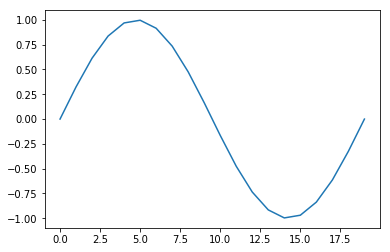

In [24]:
plt.plot(x,y)

<BarContainer object of 20 artists>

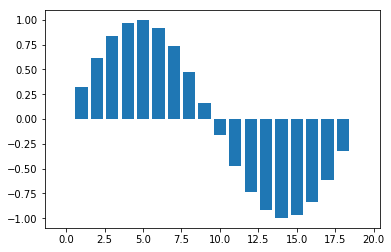

In [25]:
plt.bar(x,y)

Now let's go on our chinadata analysis. We want to show the basic sales trends in the past five months:

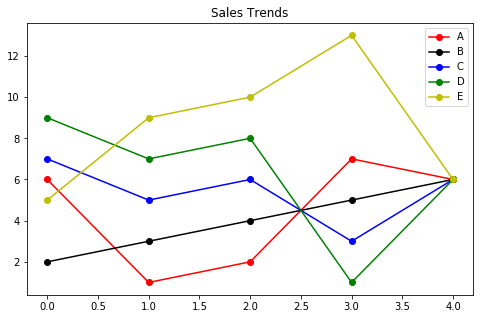

In [26]:
plt.figure(figsize=(8,5))
plt.plot(range(5),chinafood[:,0],'ro-',label='A')
plt.plot(range(5),chinafood[:,1],'ko-',label='B')
plt.plot(range(5),chinafood[:,2],'bo-',label='C')
plt.plot(range(5),chinafood[:,3],'go-',label='D')
plt.plot(range(5),chinafood[:,4],'yo-',label='E')
plt.title('Sales Trends')
plt.legend()

Also, we want to show the market share of different food in the past five months: (Here we used subplots to show multiple plots together)

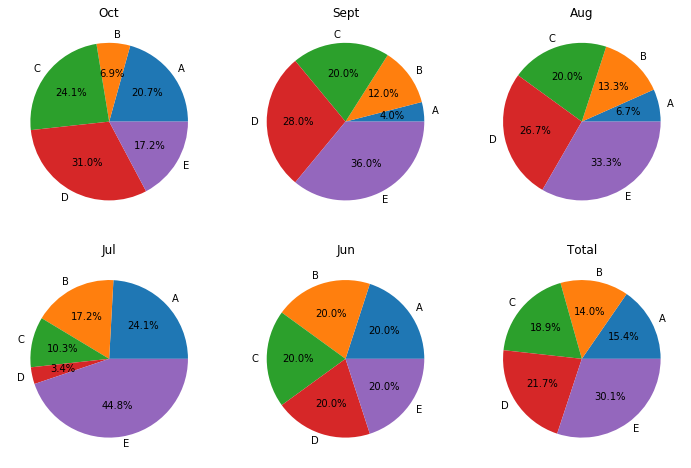

In [27]:
labels = ['A','B','C','D','E']
Month = ['Oct','Sept','Aug','Jul','Jun','Total']
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.pie(chinafood[i,:],labels=labels,autopct='%.1f%%',startangle = 0)
    plt.title(Month[i])
plt.subplot(2,3,6)
plt.pie(np.sum(chinafood,axis=0),labels=labels,autopct='%.1f%%')
plt.title(Month[5])
plt.show()

Chen Feng<br>
02/10/2019

In [10]:
colors  = {1:'1',2:'2',3:'3',4:'4'}
doc = [2,4,6,2,6]

In [11]:
[colors[word] for word in doc if word in colors]

['2', '4', '2']